In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Master in Data Science\Python\Assignments\Project - 1&2_ Simple_Reg\Project - 1&2_ Simple_Reg\delivery_time.csv")

df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In EDA We will Perforom Business moments, Null values, Data types, Correlation plots, Distribution plot for Each columns and Boxplots.

### Business Moments

In [103]:
np.mean(df)

Delivery_Time    16.790952
Sorting_Time      6.190476
dtype: float64

In [104]:
np.median(df)

10.0

In [105]:
np.var(df)

Delivery_Time    24.528209
Sorting_Time      6.154195
dtype: float64

In [106]:
np.std(df)

Delivery_Time    4.952596
Sorting_Time     2.480765
dtype: float64

In [107]:
from scipy import stats

stats.mode(df)

ModeResult(mode=array([[8., 7.]]), count=array([[1, 4]]))

### Null values and Data Types.

To see whether the data has any null values and fixing it.

In [108]:
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [109]:
df.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [111]:
df.describe() #Finds Min, Max and the 25th 50th and 75% of the data.

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Correlation Matrix

#Finds correlaation between two variables.

In [112]:
df.corr() 

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


### Correlation plot
Heatmaps are very useful to find relations between two variables in a dataset.

<IPython.core.display.Javascript object>

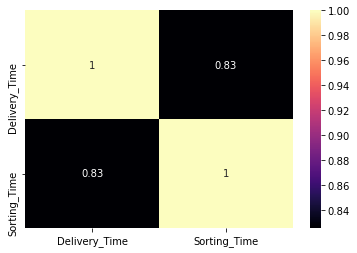

In [113]:
# 1. Heatmap

sns.heatmap(df.corr(), annot = True, cmap = 'magma')
plt.show()

We can see that both the feature and the label of our dataset are positively correlated with each other.

### Distribution of the dataset.

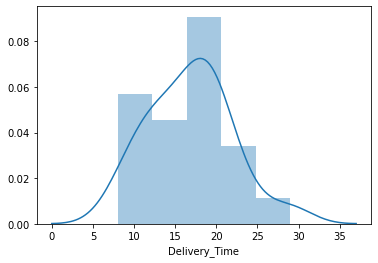

In [114]:
import seaborn as sns
sns.distplot(df['Delivery_Time'])

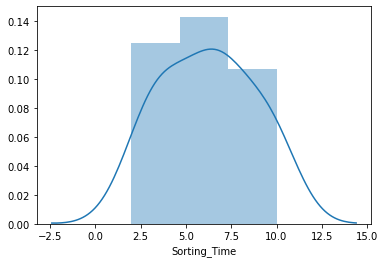

In [115]:
import seaborn as sns
sns.distplot(df['Sorting_Time'])

Both the data is distrbuted normally. We will apply some transformation further to see how this is affected.

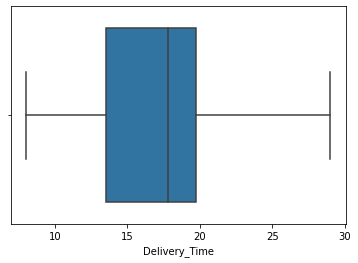

In [116]:
sns.boxplot(df['Delivery_Time'])

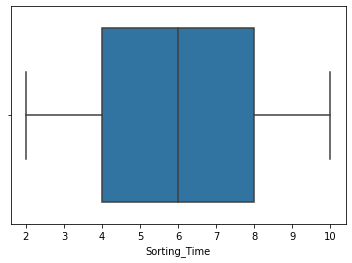

In [117]:
sns.boxplot(df['Sorting_Time'])

# Model 1: Linear Regression with statsmodel

In [118]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = df).fit()

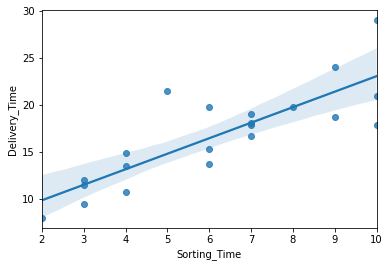

In [119]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=df);

In [120]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [121]:
#t and p-Values
print(model.tvalues, '\n', '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [122]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predict for new data point

In [123]:
newdata=pd.Series([7])

In [124]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [125]:
model.predict(data_pred)

0    18.125873
dtype: float64

# Model 2: Log transformation

In [126]:
X = df.iloc[:,-1]

y= df.iloc[:,0]

In [127]:
lreg = np.log(X)

In [128]:
lreg.head()

0    2.302585
1    1.386294
2    1.791759
3    2.197225
4    2.302585
Name: Sorting_Time, dtype: float64

In [100]:
df_drop = df.drop(['Sorting_Time'], axis=1) #dropping the sorting time

In [129]:
df_concat = pd.concat([lreg, df_drop], axis=1)  #concatinating previous sortimg_time.

df_concat.head()

,Sorting_Time,Delivery_Time
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00


In [130]:
model2 = model = smf.ols("Delivery_Time~Sorting_Time", data = df_concat).fit()

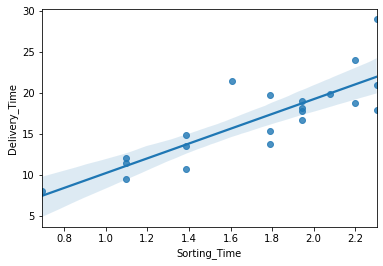

In [131]:
sns.regplot(x = 'Sorting_Time', y='Delivery_Time', data=df_concat)

In [133]:
#Coefficients
model2.params

Intercept       1.159684
Sorting_Time    9.043413
dtype: float64

In [134]:
#t and p-Values
print(model2.tvalues, '\n', '\n', model2.pvalues)

Intercept       0.472460
Sorting_Time    6.586789
dtype: float64 
 
 Intercept       0.641980
Sorting_Time    0.000003
dtype: float64


In [135]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

### Prediction for new data point with Model 2

In [145]:
newdata2=pd.Series([7])

In [146]:
data_pred2=pd.DataFrame(newdata2,columns=['Sorting_Time'])

In [147]:
model2.predict(data_pred2)

0    64.463578
dtype: float64

# Model 3 - Sqrt tranfromation

In [148]:
Sreg = np.sqrt(X)

In [149]:
Sreg.head()

0    3.162278
1    2.000000
2    2.449490
3    3.000000
4    3.162278
Name: Sorting_Time, dtype: float64

In [152]:
df_drop = df.drop(['Sorting_Time'], axis=1) #dropping the sorting time

In [156]:
df_concat2 = pd.concat([Sreg, df_drop], axis=1)  #concatinating previous sortimg_time.

df_concat2.head()

,Sorting_Time,Delivery_Time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00


In [157]:
model3 = model = smf.ols("Delivery_Time~Sorting_Time", data = df_concat2).fit()

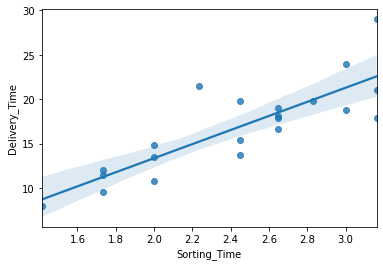

In [158]:
sns.regplot(x = 'Sorting_Time', y='Delivery_Time', data=df_concat2)

In [160]:
#Coefficients
model3.params

Intercept      -2.518837
Sorting_Time    7.936591
dtype: float64

In [161]:
#t and p-Values
print(model3.tvalues, '\n', '\n', model3.pvalues)

Intercept      -0.840911
Sorting_Time    6.592434
dtype: float64 
 
 Intercept       0.410857
Sorting_Time    0.000003
dtype: float64


In [162]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

### Prediction for a newdata point with Model 3

In [169]:
newdata3=pd.Series([7])

In [170]:
data_pred3=pd.DataFrame(newdata3,columns=['Sorting_Time'])

In [171]:
model3.predict(data_pred3)

0    53.037299
dtype: float64

# Model 4 - Sklearn model

In [175]:
# Splitting the dataset

X = df.iloc[:,-1].values.reshape(-1,1) #feature

y= df.iloc[0:,0].values.reshape(-1,1) #label

In [176]:
# Step 2: Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [177]:
# Step 3: Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [178]:
# Step 4: Make Prediction
y_pred = regressor.predict(X_test)

# Visualizing the training set

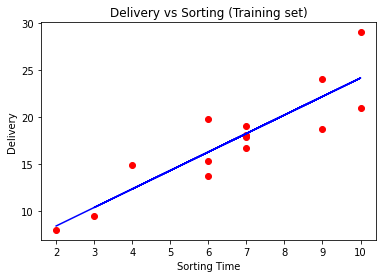

In [179]:
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Delivery vs Sorting (Training set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery')
plt.show()

# Visualizing the test set

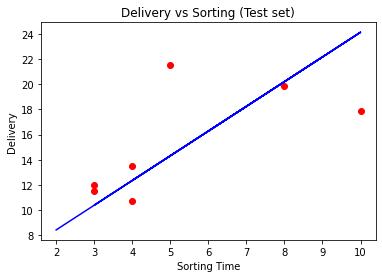

In [180]:
# Step 6 - Visualize test set results
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Delivery vs Sorting (Test set)')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery')
plt.show()

In [182]:
from sklearn.metrics import r2_score

#R squared values
print(f'r_sqr value: {regressor.score(X_train, y_train)}')

r_sqr value: 0.7917489342165316


### Make new predictions

In [181]:
# Step 7 - Make new prediction
new_delivery_pred = regressor.predict([[7]])

print('Predicted Delivery time is: ', new_delivery_pred )

Predicted Delivery time is:  [[18.2446346]]


In [184]:
#Predicting all the Delivery_Times

# Predicting the Test set results

new_delivery_pred4 = regressor.predict(X_test)

print('Predicted Delivery_Times are: ', new_delivery_pred4 )

Predicted Delivery_Times are:  [[24.13956522]
 [10.3847271 ]
 [14.31468085]
 [12.34970398]
 [12.34970398]
 [20.20961147]
 [10.3847271 ]]


# R sqaure and Predicted values for Model 1, Model 2, Model 3.

<li> R suare values of: 68%, 69% and 79% for Model with different transformations.
<li> For a Sorting time of 7 the predicted delivery time is: <B>18, 64, 53.